In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import levene, f_oneway
import seaborn as sns


In [3]:
csv_dir = Path('/scratch/mlsample/research/project_files/alphafold2/distributed_alphafold2/distributed_alphafold2/zna_rbd_results.csv').resolve()
df = pd.read_csv(csv_dir)

In [4]:
df

,query,prot_pdb,p_val,rmsd,identity,similarity,score,afp,proteome,TM1,TM2,RMSD,ID1,ID2,IDali,L1,L2,Lali
0,Equineparapoxvirus_ZNA.pdb,Raccoonpoxvirus_ZNA.pdb,2.310000e-07,2.62,0.2500,0.3529,163.51,1916.0,zna,0.6979,0.6614,1.64,0.200,0.188,0.250,80.0,85.0,64.0
1,Equineparapoxvirus_ZNA.pdb,Humanorfvirus_ZNA.pdb,5.580000e-13,1.03,0.3968,0.4603,182.00,1785.0,zna,0.7394,0.7394,1.94,0.338,0.338,0.409,80.0,80.0,66.0
2,Equineparapoxvirus_ZNA.pdb,WTPXV_ZNA.pdb,3.140000e-07,2.97,0.2778,0.4167,184.91,2590.0,zna,0.7227,0.5280,1.81,0.212,0.150,0.258,80.0,113.0,66.0
3,Equineparapoxvirus_ZNA.pdb,ALKPXV_ZNA.pdb,2.560000e-08,1.65,0.2344,0.3594,160.84,2301.0,zna,0.6862,0.5519,1.69,0.200,0.157,0.254,80.0,102.0,63.0
4,Equineparapoxvirus_ZNA.pdb,YLDVPXV_ZNA.pdb,9.100000e-10,1.67,0.1765,0.3382,180.93,2237.0,zna,0.7078,0.6007,2.31,0.163,0.134,0.186,80.0,97.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23099,Ectromeliavirus_RBD.pdb,VACV_dsRBD.pdb,0.000000e+00,0.61,0.9432,0.9886,239.80,2541.0,rbd,0.7948,0.9691,0.61,0.769,0.943,0.943,108.0,88.0,88.0
23100,Ectromeliavirus_RBD.pdb,Goatproliferativedermatitisvirus_RBD.pdb,5.170000e-13,2.11,0.2812,0.4792,247.78,2814.0,rbd,0.7736,0.8613,1.89,0.250,0.281,0.287,108.0,96.0,94.0
23101,Ectromeliavirus_RBD.pdb,RaccoonPXV_dsRBD.pdb,0.000000e+00,0.92,0.7841,0.8864,236.08,2547.0,rbd,0.7699,0.9459,0.92,0.639,0.793,0.793,108.0,87.0,87.0
23102,Ectromeliavirus_RBD.pdb,ViriolaMajor_RBD.pdb,0.000000e+00,1.39,0.9806,0.9903,282.39,3341.0,rbd,0.9033,0.9456,1.31,0.926,0.971,0.971,108.0,103.0,103.0


In [5]:
query_zna = df[df['query'].str.contains('ZNA')]
query_prot_zna = query_zna[query_zna['prot_pdb'].str.contains('ZNA')]

query_rbd = df[df['query'].str.contains('RBD')]
query_prot_rbd = query_rbd[query_rbd['prot_pdb'].str.contains('RBD')]

query_prot_vacina_zna = query_prot_zna[query_prot_zna['query'].str.contains('Vacciniavirus_')]
query_prot_vacina_rbd = query_prot_rbd[query_prot_rbd['query'].str.contains('Vacciniavirus_')]


In [8]:
query_prot_vacina_rbd

,query,prot_pdb,p_val,rmsd,identity,similarity,score,afp,proteome,TM1,TM2,RMSD,ID1,ID2,IDali,L1,L2,Lali
10260,Vacciniavirus_RBD.pdb,CTCPXV_dsRBD.pdb,0.000000e+00,0.82,0.4205,0.5795,238.91,2676.0,rbd,0.7891,0.9020,0.82,0.346,0.398,0.420,107.0,93.0,88.0
10261,Vacciniavirus_RBD.pdb,ViriolaMajor_dsRBD.pdb,0.000000e+00,0.45,0.9659,0.9886,239.67,2520.0,rbd,0.8113,0.9831,0.45,0.794,0.966,0.966,107.0,88.0,88.0
10262,Vacciniavirus_RBD.pdb,ETMPXV_dsRBD.pdb,0.000000e+00,0.54,0.9432,0.9773,239.56,2507.0,rbd,0.8064,0.9757,0.54,0.776,0.943,0.943,107.0,88.0,88.0
10263,Vacciniavirus_RBD.pdb,TateraPXV_dsRBD.pdb,0.000000e+00,0.48,0.9545,0.9773,239.68,2515.0,rbd,0.8099,0.9810,0.48,0.785,0.955,0.955,107.0,88.0,88.0
10264,Vacciniavirus_RBD.pdb,SFV_dsRBD.pdb,0.000000e+00,0.82,0.4773,0.6818,238.94,2533.0,rbd,0.7885,0.9493,0.82,0.393,0.477,0.477,107.0,88.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,Vacciniavirus_RBD.pdb,VACV_dsRBD.pdb,0.000000e+00,0.53,0.9659,0.9886,239.58,2515.0,rbd,0.8071,0.9767,0.53,0.794,0.966,0.966,107.0,88.0,88.0
10332,Vacciniavirus_RBD.pdb,Goatproliferativedermatitisvirus_RBD.pdb,1.260000e-13,1.93,0.2947,0.4632,247.38,2730.0,rbd,0.7801,0.8611,1.93,0.262,0.292,0.298,107.0,96.0,94.0
10333,Vacciniavirus_RBD.pdb,RaccoonPXV_dsRBD.pdb,0.000000e+00,1.00,0.8068,0.8864,235.48,2509.0,rbd,0.7724,0.9396,1.00,0.664,0.816,0.816,107.0,87.0,87.0
10334,Vacciniavirus_RBD.pdb,ViriolaMajor_RBD.pdb,0.000000e+00,0.71,0.9684,0.9895,276.00,3260.0,rbd,0.8713,0.9040,1.54,0.897,0.932,0.970,107.0,103.0,99.0


In [4]:
columns_to_keep = ['score', 'p_val', '-log_pval', 'rmsd', 'TM1', 'TM2']
query_prot_vacina_zna['-log_pval'] = -np.log10(query_prot_vacina_zna['p_val'] + 1e-15)
query_prot_vacina_rbd['-log_pval'] = -np.log10(query_prot_vacina_rbd['p_val']+ 1e-15)

zna_stats = query_prot_vacina_zna[columns_to_keep].var()
rbd_stats = query_prot_vacina_rbd[columns_to_keep].var()

/tmp/ipykernel_3604859/1935228633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_prot_vacina_zna['-log_pval'] = -np.log10(query_prot_vacina_zna['p_val'] + 1e-15)
/tmp/ipykernel_3604859/1935228633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_prot_vacina_rbd['-log_pval'] = -np.log10(query_prot_vacina_rbd['p_val']+ 1e-15)


In [22]:
zna_stats_df = zna_stats.reset_index()
zna_stats_df.columns = ['Statistic', 'ZNA Variance']
zna_stats_df.index = ['Score', 'P-Value', '-log(P-Value)', 'RMSD', 'TM1', 'TM2']
zna_stats_df.drop('Statistic', axis=1, inplace=True)
zna_stats_df = zna_stats_df.T

rbd_stats_df = rbd_stats.reset_index()
rbd_stats_df.columns = ['Statistic', 'RBD Variance']
rbd_stats_df.index = ['Score', 'P-Value', '-log(P-Value)', 'RMSD', 'TM1', 'TM2']
rbd_stats_df.drop('Statistic', axis=1, inplace=True)
rbd_stats_df = rbd_stats_df.T


combined_stats = pd.concat([zna_stats_df, rbd_stats_df])

combined_stats.loc['ZNA Variance / (ZNA Variance + RBD Variance)'] = combined_stats.loc['ZNA Variance'] / (combined_stats.loc['ZNA Variance'] + combined_stats.loc['RBD Variance'])
combined_stats.loc['RBD Variance / (ZNA Variance + RBD Variance)'] = combined_stats.loc['RBD Variance'] / (combined_stats.loc['ZNA Variance'] + combined_stats.loc['RBD Variance'])
# combined_stats.loc['F-Test P-Value'] = f_oneway(query_prot_vacina_zna['score'], query_prot_vacina_rbd['score']).pvalue
combined_stats.loc['ZNA Variance / RBD Varaince'] = combined_stats.loc['ZNA Variance'] / combined_stats.loc['RBD Variance']

combined_stats.to_csv('zna_rbd_variance_stats.csv')

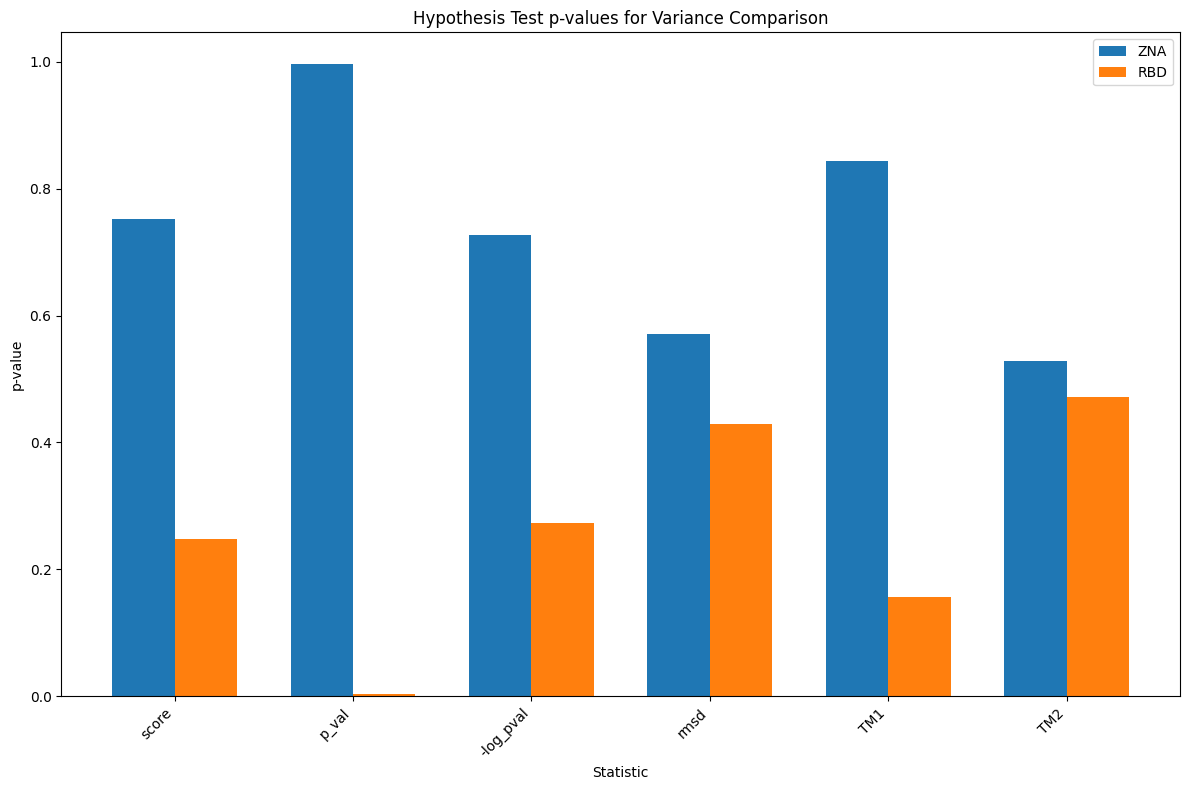

In [10]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

total_var = (zna_stats.values + rbd_stats.values)

# Number of groups and bars
n_groups = len(zna_stats)
index = np.arange(n_groups)
bar_width = 0.35

# Plot the bars
bar1 = ax.bar(index, zna_stats.values / total_var, bar_width, label='ZNA')
bar2 = ax.bar(index + bar_width, rbd_stats.values / total_var, bar_width, label='RBD')

# Add labels, title, and legend
ax.set_xlabel('Statistic')
ax.set_ylabel('p-value')
ax.set_title('Hypothesis Test p-values for Variance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columns_to_keep, rotation=45, ha='right')
# ax.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
query_prot_vacina_zna['Group'] = 'ZNA'
query_prot_vacina_rbd['Group'] = 'RBD'
combined_df = pd.concat([query_prot_vacina_zna, query_prot_vacina_rbd])

combined_df

In [ ]:

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create the violin plot
sns.violinplot(x='Group', y='TM1', hue='Group', data=combined_df)

# Add labels and title
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Distribution of Statistics by Group')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
columns_to_keep = ['score', 'p_val', '-log_pval', 'rmsd', 'identity', 'similarity', 'TM1', 'TM2', 'RMSD']
query_prot_vacina_zna['-log_pval'] = -np.log10(query_prot_vacina_zna['p_val'] + 1e-15)
query_prot_vacina_rbd['-log_pval'] = -np.log10(query_prot_vacina_rbd['p_val']+ 1e-15)

zna_stats = query_prot_vacina_zna[columns_to_keep].var()
rbd_stats = query_prot_vacina_rbd[columns_to_keep].var()


In [ ]:
f_test_results

In [ ]:
# Perform F-test for each column
f_test_results = {col: (zna_stats[col] / rbd_stats[col], f_oneway(query_prot_vacina_zna[col], query_prot_vacina_rbd[col]).pvalue) for col in columns_to_keep}
levene_test_results = {col: levene(query_prot_vacina_zna[col], query_prot_vacina_rbd[col]) for col in columns_to_keep}

# Extract p-values for visualization
f_test_pvalues = [result[1] for result in f_test_results.values()]
levene_test_pvalues = [result.pvalue for result in levene_test_results.values()]

# Create a DataFrame for visualization
df_pvalues = pd.DataFrame({
    'Statistic': columns_to_keep,
    'F-test p-value': f_test_pvalues,
    'Levene\'s test p-value': levene_test_pvalues
})

df_pvalues.set_index('Statistic', inplace=True)

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Number of groups and bars
n_groups = len(df_pvalues)
index = np.arange(n_groups)
bar_width = 0.35

# Plot the bars
bar1 = ax.bar(index, df_pvalues['F-test p-value'], bar_width, label='F-test p-value')
bar2 = ax.bar(index + bar_width, df_pvalues['Levene\'s test p-value'], bar_width, label='Levene\'s test p-value')

# Add labels, title, and legend
ax.set_xlabel('Statistic')
ax.set_ylabel('p-value')
ax.set_title('Hypothesis Test p-values for Variance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_pvalues.index, rotation=45, ha='right')
ax.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:



query_prot_vacina_zna.plot.scatter(x='TM2', y='-log_pval', c='rmsd', cmap='viridis')

query_prot_vacina_rbd.plot.scatter(x='TM2', y='-log_pval', c='rmsd', cmap='viridis')

In [ ]:
query_prot_vacina_zna

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
display(query_dfs['m029.pdb'][query_dfs['m029.pdb']['TM2'] > 0.4][query_dfs['m029.pdb']['p_val'] > 0].sort_values(by='similarity', ascending=False, inplace=False))

In [ ]:
query_names = df['query'].unique()
query_dfs = {elem : pd.DataFrame() for elem in query_names}
for key in query_dfs.keys():
    query_dfs[key] = df[:][df['query'] == key]
    
for key, sub_df in query_dfs.items():
    sub_df['-log_pval'] = -np.log10(sub_df['p_val'])
    sub_df.plot.scatter(y='-log_pval', x='TM2', c='identity')
    # sub_df.plot.scatter(y='-log_pval', x='identity', c='rmsd')
    plt.title(key)